<a href="https://colab.research.google.com/github/Sreejak2205/pds1/blob/main/dataanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Uploading


In [15]:
import pandas as pd

# /content/raw_data.csv
file_path = '/content/raw_data.csv'

# Data Loading using Pandas
df = pd.read_csv(file_path)

# Data Set Preview
df.head(11)

,Height,Weight,Age,Grip strength,Frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y
5,68.7,123,50,26,N
6,69.8,141,51,22,Y
7,70.1,136,23,20,Y
8,67.9,112,17,19,N
9,66.8,120,39,31,N


Create folder ,for raw data and file for result of raw data


In [16]:
# Create the directory for raw data
!mkdir -p Frailty_project/data_raw

# Move your dataset into this folder (assuming it's already saved as raw_Frailty_data.csv)
!mv frailty_data.csv Frailty_project/data_raw/raw_data.csv

# Create a README file explaining the raw data contents
!echo "Raw dataset for 10 female participants measuring Height, Weight, Age, Grip Strength, and Frailty." > Frailty_project/data_raw/README.txt

mv: cannot stat 'frailty_data.csv': No such file or directory


Similarly as above created folder for clean data.

In [17]:
# Create directories for cleaned data and source code
!mkdir -p Frailty_project/data_clean
!mkdir -p Frailty_project/src

# Create a Python script to clean the data (for example, handling missing values)
!touch Frailty_project/src/clean_data.py

DATA CLEANING

In [18]:
# Using the isnull method to identify and count missing values in each column
missing_values_count = df.isnull().sum()

# Displaying Missing Values Count
print("Missing values count in each column:")
print(missing_values_count)

# Checking for overall missing values using the isnull().any().sum() approach
total_missing = df.isnull().any().sum()
if total_missing > 0:
    print(f"There are missing values in {total_missing} columns.")
else:
    print("No missing values in the DataFrame.")

Missing values count in each column:
Height           0
Weight           0
Age              0
Grip strength    0
Frailty          0
dtype: int64
No missing values in the DataFrame.


In [19]:
import pandas as pd
import os
# Ensure the directory exists
output_dir = 'Frailty_project/data_clean'

# Filter the DataFrame where column 4 does not contain 'N'
df_filtered = df[df.iloc[:, 4].str.contains('N') == False]

# Display the filtered DataFrame
print(df_filtered)

# Save the cleaned data to the specified folder
output_path = os.path.join(output_dir, 'cleaned_data.csv')
df_filtered.to_csv(output_path, index=False)

   Height  Weight  Age  Grip strength Frailty
3    68.2     142   22             28       Y
4    67.8     144   29             24       Y
6    69.8     141   51             22       Y
7    70.1     136   23             20       Y


In [20]:
import pandas as pd
import os
# Ensure the directory exists
output_dir = 'Frailty_project/data_clean'

# Filter the DataFrame where column 4 does not contain 'N'
df_filtered = df[df.iloc[:, 4].str.contains('N') == False]

# Display the filtered DataFrame
print(df_filtered)

# Save the cleaned data to the specified folder
output_path = os.path.join(output_dir, 'cleaned_data.csv')
df_filtered.to_csv(output_path, index=False)

   Height  Weight  Age  Grip strength Frailty
3    68.2     142   22             28       Y
4    67.8     144   29             24       Y
6    69.8     141   51             22       Y
7    70.1     136   23             20       Y


T-Test Results for Age and Grip Strength:
   Statistic  P-value
0   1.111166  0.30903
No significant difference found between Age and Grip Strength.


<Figure size 800x600 with 0 Axes>

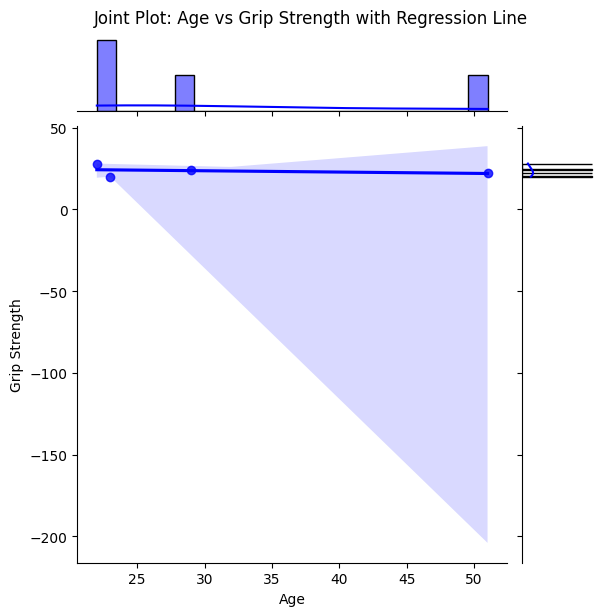

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import ttest_ind

# Perform T-Test analysis between 'Age' and 'Grip strength'
ttest_results = ttest_ind(df_filtered['Age'], df_filtered['Grip strength'])

# Display T-Test results in tabular form
ttest_table = pd.DataFrame({
    'Statistic': [ttest_results.statistic],
    'P-value': [ttest_results.pvalue]
})

print("T-Test Results for Age and Grip Strength:")
print(ttest_table)

# Interpret T-Test results
if ttest_results.pvalue < 0.05:
    print("Significant difference found between Age and Grip Strength.")
else:
    print("No significant difference found between Age and Grip Strength.")

# Create a joint plot to visualize the relationship between Age and Grip Strength
plt.figure(figsize=(8, 6))
sns.jointplot(
    x='Age',
    y='Grip strength',
    data=df_filtered,
    kind='reg',   # Add regression line
    color='blue',
    marginal_kws={'bins': 20, 'fill': True}  # Control for marginal histograms
)

# Customize plot
plt.suptitle('Joint Plot: Age vs Grip Strength with Regression Line', y=1.02)
plt.xlabel('Age')
plt.ylabel('Grip Strength')

# Display the plot
plt.show()
